# Nuclear Norm Minimization to predict missing ratings in Movielens 100K dataset.

In [1]:
# Libraries Used.
#------------------
import pandas as pd
import numpy as np
from numpy import linalg as LA
from scipy.sparse.linalg import svds
from scipy.sparse import coo_matrix
from sklearn.metrics import mean_absolute_error
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Training dataframe => u1.base file
df = pd.read_csv('./Dataset/ml-100k/u1.base', sep='\t', names=['userId', 'itemId', 'Rating', 'Timestamp'])
df

,userId,itemId,Rating,Timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712
...,...,...,...,...
79995,943,1067,2,875501756
79996,943,1074,4,888640250
79997,943,1188,3,888640250
79998,943,1228,3,888640275


In [3]:
# Create pivot table => Shape is 943 x 1650
pt_df = pd.pivot_table(df, values='Rating', index='userId', columns='itemId')
pt_df

itemId,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
userId,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,NaN,4.0,1.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Fill 0 in place of NA values.
pt_df.fillna(0, inplace=True)
pt_df

itemId,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
userId,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,0.0,4.0,1.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,2.0,0.0,0.0,4.0,5.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Created a coo_matrix => To get the row and column of existing values of rating.
coo_mat = coo_matrix(pt_df.values)
d_coo_mat = coo_mat.todok()
d_coo_mat_keys = d_coo_mat.keys()
rows, cols = zip(*d_coo_mat_keys)
d_coo_mat_values = d_coo_mat.values()

In [6]:
# Created a new pivot table of 943 x 1682 shape.
pt = np.zeros((943, 1682))
pt[rows, cols] = list(d_coo_mat_values)
# print(pt.shape) # 943 x 1682
pt_table = pd.DataFrame(pt)
Columns = [i+1 for i in range(1682)]
Rows = [i+1 for i in range(943)]
pt_table.columns = Columns
pt_table.index = Rows
pt_table

,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
1,5.0,3.0,4.0,3.0,3.0,0.0,4.0,1.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,2.0,0.0,0.0,4.0,5.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Variables:
#--------------
latent_factors = 5
epocs = 100
lamdas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [8]:
# Y matrix.
Y = pt_table.values.tolist()  # 943 x 1682

# Xg matrix.
Xg = np.random.uniform(low = 1, high = 5, size = (943, 1682))

# R matrix => Mask matrix
R = pt_table.mask(pt_table > 0, 1).values.tolist()  # 943 x 1682

In [9]:
# funcction return the matrix havig predicted rating values.
def myNNM(Y, X, R, epocs, latent_factors, lamda):
    for i in range(epocs):
        B = (X + (Y - np.multiply(R, X)))  # B matrix.
        
        # Applying SVD. 
        U, S, VT = svds(B, k = latent_factors)
        new_S = np.zeros((S.shape[0], S.shape[0]))
        np.fill_diagonal(new_S, S)
        
        # sigma matrix.
        sigma = np.maximum(np.zeros((new_S.shape[0], new_S.shape[1])), new_S - 1)
        
        # summation matrix.
        summation = np.zeros((sigma.shape[0], sigma.shape[1]))
        np.fill_diagonal(summation, sigma.diagonal())
        
        # creating new X.
        Xi = np.dot(np.dot(U, summation), VT)
        X = Xi
        
    return Xi

In [10]:
# test dataset => u1.test
test_df = pd.read_csv('./Dataset/ml-100k/u1.test', sep='\t', names=['userId', 'itemId', 'Rating', 'Timestamp'])

user = test_df['userId'].tolist()
item = test_df['itemId'].tolist()
actual_ratings = test_df['Rating'].tolist()

# return MAE.
def return_mae(Xi):
    predicted_ratings = []
    for u, i in zip(user, item):
        predicted_ratings.append(Xi[u-1][i-1])
    
    return mean_absolute_error(actual_ratings, predicted_ratings)

In [11]:
# get MAE for each value of lambda.
lam = []
maes = []

for lamda in lamdas:
    Xi = myNNM(Y, Xg, R, epocs, latent_factors, lamda)
    mae = return_mae(Xi)
    print("For lamda =", lamda)
    print("MAE =", mae, "\n")
    lam.append(lamda)
    maes.append(mae)

For lamda = 0.1
MAE = 0.787294992523516 

For lamda = 0.2
MAE = 0.7872949925235163 

For lamda = 0.3
MAE = 0.7872949925235163 

For lamda = 0.4
MAE = 0.787294992523517 

For lamda = 0.5
MAE = 0.7872949925235162 

For lamda = 0.6
MAE = 0.7872949925235159 

For lamda = 0.7
MAE = 0.7872949925235168 

For lamda = 0.8
MAE = 0.7872949925235162 

For lamda = 0.9
MAE = 0.7872949925235169 



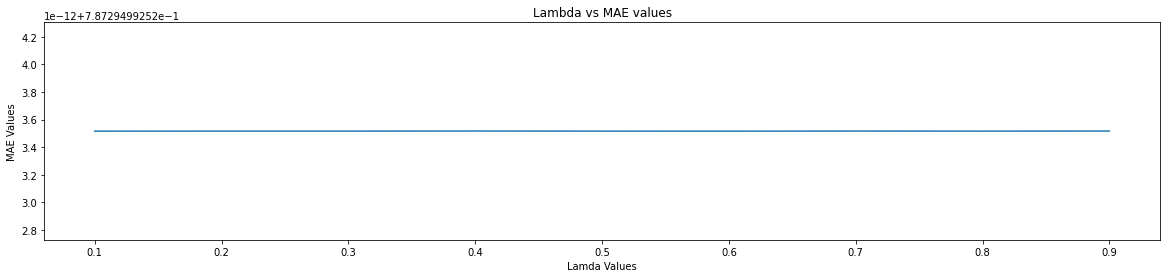

In [17]:
# plot the graph of lambda vs MAE.
plt.figure(figsize=(20, 4))
# plt.gca().set_ylim([0.9620438050869512 ,0.9620438050869512])
plt.plot(lamdas, maes)
plt.xlabel("Lamda Values")
plt.ylabel("MAE Values")
plt.title("Lambda vs MAE values")
plt.savefig("./figure.jpg", dpi=400, bbox_inches='tight')
plt.show()